#Practica 1: Regresión Lineal

## Alumno: Cano Portugal Israel Daniel Arturo
## Profesor: Jiménez Alcantar Daniel
## Grupo: 5AV1
## Materia: Aprendizaje a Maquina e Inteligencia Artificial



## Introduccion
La regresión lineal es un método estadístico y de machine learning utilizado para modelar la relación entre una variable dependiente (también llamada variable de respuesta o target) y una o más variables independientes (predictores o features). El objetivo principal es predecir valores continuos de la variable dependiente basados en los predictores, asumiendo que existe una relación lineal entre ellos.

Fórmula Básica: En su forma simple (regresión lineal univariada), se representa como:
$$y = \beta_0 + \beta_1 x + \epsilon$$
Donde:

* $ y $: Variable dependiente (lo que queremos predecir).
* $ x $: Variable independiente.
* $ \beta_0 $: Intersección (bias).
* $ \beta_1 $: Pendiente (coeficiente que indica la fuerza y dirección de la relación).
* $ \epsilon $: Término de error (residuos aleatorios).



En la regresión lineal múltiple, se extiende a múltiples variables independientes:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$$
Este modelo se entrena minimizando el error cuadrático medio (MSE) mediante técnicas como el método de los mínimos cuadrados ordinarios (OLS) o gradiente descendente. Es ampliamente usado en escenarios como predicción de precios, estimación de ventas o análisis de tendencias.

Ventajas: Simple de implementar, interpretable y eficiente computacionalmente.

Limitaciones: Asume linealidad, independencia de errores y homocedasticidad (varianza constante de errores). No maneja bien datos no lineales o outliers sin preprocesamiento.
Aplicaciones Reales: En finanzas (predicción de precios de acciones), marketing (estimación de ROI) o salud (predicción de peso basado en altura y edad).


## Problematica
Se debe automatizar y recoletar un dataset a partir de los tickets de ventas de productos, asegurándose de que los datos estén correctamente preprocesados y estructurados para poder integrarlos en un modelo de aprendizaje automático de regresión lineal.

## Metodologia

Para esta práctica, se adopta una metodología de ciencia de datos basada en el marco CRISP-DM (Cross-Industry Standard Process for Data Mining). CRISP-DM proporciona un proceso iterativo y estructurado, dividido en seis fases principales: Comprensión del Negocio, Comprensión de los Datos, Preparación de los Datos, Modelado, Evaluación y Despliegue. Esta metodología se adapta específicamente a la práctica, enfocándose en las fases relevantes para la extracción de datos no estructurados (PDFs) y su preparación para modelado predictivo. El proceso es iterativo, permitiendo retroalimentación entre fases para refinar resultados.

Se utilizan herramientas de programación en Python para garantizar reproducibilidad, eficiencia y escalabilidad. A continuación, se detalla cada fase adaptada al contexto de la práctica.

### **1. Comprensión del Negocio (Business Understanding)**

El desafío de esta práctica se centra en la transformación de datos no estructurados, provenientes de tickets de venta en formato PDF, en información valiosa para la toma de decisiones empresariales. La meta es predecir variables continuas, como el valor total de una venta, basándose en atributos extraídos de estos tickets. Para ello, se empleará la regresión lineal como una herramienta de Machine Learning que permita modelar y comprender las relaciones entre las variables.

**Problema del Negocio:**
La empresa necesita automatizar el análisis de sus ventas. Los datos están dispersos en tickets de venta en formato PDF, lo que impide un análisis ágil y la identificación de patrones clave. Esto obstaculiza la capacidad de la empresa para pronosticar ingresos, optimizar precios y entender el impacto de los diferentes factores de venta.

**Objetivos:**
* **Crear un Dataset Estructurado:** Generar un dataset limpio y unificado a partir de los tickets en PDF, asegurando que los datos estén listos para el análisis y el modelado predictivo.
* **Construir un Modelo Predictivo:** Desarrollar un modelo de regresión lineal capaz de predecir con precisión el total de la venta de un ticket basándose en la cantidad y el tipo de productos, así como el método de pago.
* **Identificar Factores Clave de Ingresos:** Analizar los coeficientes del modelo para identificar qué variables (por ejemplo, tipos de productos, descuentos, etc.) tienen el mayor impacto en el total de la venta.

**Criterios de Éxito:**
* **Calidad del Dataset:** El dataset final debe tener menos del 5% de valores faltantes y una estructura que facilite la ingesta en un modelo de Machine Learning.
* **Rendimiento del Modelo:** El modelo de regresión lineal debe alcanzar un $R^2$ ajustado superior a 0.85 en el conjunto de datos de prueba, con un Error Absoluto Medio (MAE) que demuestre que el modelo tiene la capacidad de hacer predicciones precisas.
* **Interpretación:** Los coeficientes del modelo deben ser interpretables y proporcionar información clara sobre las relaciones entre los predictores y la variable objetivo, permitiendo una fácil comunicación de los hallazgos a las partes interesadas del negocio.

### **2. Comprensión de los Datos (Data Understanding)**

El objetivo de esta fase es examinar y comprender los datos brutos extraídos de los tickets en PDF para identificar su estructura, calidad y posibles limitaciones antes de la preparación y el modelado.

**Inspección de Tickets:** Los 5 tickets muestran una estructura consistente:

In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 78.1 MB/s eta 0:00:00


In [296]:
# Importar bibliotecas necesarias
import os
import random
import pdfplumber
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor, HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='jupyter_client')

In [ ]:
# Configurar la ruta de los PDFs
path = "C:/Users/Administrator/Documents/tarea/ESCOM/5S/ML/TicketsPDF/"

# Obtener lista de archivos PDF en la carpeta
pdf_files = [f for f in os.listdir(path) if f.endswith('.pdf')]

# Seleccionar 5 PDFs aleatorios
random.seed(42)  # Para reproducibilidad
selected_pdfs = random.sample(pdf_files, min(5, len(pdf_files)))  # Asegura no exceder el número de archivos

# Función para extraer y mostrar texto de un PDF
def visualizar_pdf(file_path):
    print(f"\n=== Contenido del PDF: {os.path.basename(file_path)} ===")
    try:
        with pdfplumber.open(file_path) as pdf:
            for i, page in enumerate(pdf.pages):
                print(f"\nPágina {i+1}:")
                # Extraer texto crudo
                text = page.extract_text()
                if text:
                    print(text)
                else:
                    print("No se encontró texto en esta página. ¿Es un PDF escaneado?")
                # Extraer tablas si existen
                tables = page.extract_tables()
                if tables:
                    print("\nTablas encontradas en la página:")
                    for j, table in enumerate(tables):
                        # Convertir tabla a DataFrame para mejor visualización
                        df_table = pd.DataFrame(table)
                        print(f"\nTabla {j+1}:")
                        print(df_table)
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")

# Visualizar los 5 PDFs seleccionados
for pdf_file in selected_pdfs:
    full_path = os.path.join(path, pdf_file)
    visualizar_pdf(full_path)


=== Contenido del PDF: Ticket_NXDFIZ.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #NXDFIZ
Fecha: 23/07/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $4625.08
Descuento: $0.00
IVA (16%): $740.01
Total: $5355.52
Cant Producto Precio Total
3 Pollo 1kg $121.09 $363.28
1 Huevos 12pz $76.89 $76.89
2 Pollo 1kg $117.17 $234.35
3 Detergente 2kg $86.42 $259.26
2 Arroz 1kg $41.63 $83.26
3 Huevos 12pz $76.30 $228.89
2 Pollo 1kg $119.69 $239.39
3 Leche 1L $25.47 $76.40
1 Microondas $1943.38 $1943.38
3 Pan Baguette $28.79 $86.37
8 Pollo 1kg $124.66 $997.29
1 Refresco 2L $36.32 $36.32

=== Contenido del PDF: Ticket_3L9QAN.pdf ===

Página 1:
TICKET DE COMPRA
Ticket #3L9QAN
Fecha: 29/08/2025
Lugar de pago: Tienda Walmart
Método de pago: Tarjeta
Subtotal: $6439.07
Descuento: $321.95
IVA (16%): $978.74
Total: $7142.93
Cant Producto Precio Total
1 Leche 1L $26.20 $26.20
3 Refresco 2L $36.58 $109.73
2 Licuadora $783.81 $1567.63
3 Pollo 1kg $117.91 $353.72
3 Detergente 2kg $89.35 $268.

Los 5 tickets aleatorios que se visualizan revelan una estructura consistente:

**Metadatos del Ticket:** Cada ticket contiene un encabezado con información clave:

* Ticket # (un identificador único).
* Fecha (en formato dd/mm/yyyy).
* Lugar de pago y Método de pago.
* Un resumen financiero con Subtotal, Descuento, IVA y Total.
* Tabla de Ítems: Un cuerpo con una tabla de ítems que detalla cada producto vendido, incluyendo las columnas Cant, Producto, Precio (unitario) y Total (por ítem).

In [ ]:
# Lista para almacenar datos y errores
datos = []
errores = []

# Regex mejorado
regex_patterns = {
    'ticket_id': r'Ticket #(\w+)',
    'fecha': r'Fecha:\s*(\d{2}/\d{2}/\d{4})',
    'subtotal': r'Subtotal:\s*\$([\d\.]+)',
    'descuento': r'Descuento:\s*\$([\d\.]+)',
    'iva': r'IVA\s*\(16%\):\s*\$([\d\.]+)',
    'total': r'Total:\s*\$([\d\.]+)',
    'metodo_pago': r'Método de pago:\s*(\w+)',
    'items': r'^(\d+)\s+([^\d\n][^\$]*?)\s+\$(\d+\.\d{2})\s+\$(\d+\.\d{2})$'
}

# Procesar cada PDF
for pdf_file in pdf_files:
    full_path = os.path.join(path, pdf_file)
    try:
        with pdfplumber.open(full_path) as pdf:
            if not pdf.pages:
                errores.append(f"{pdf_file}: PDF vacío")
                continue
            page = pdf.pages[0]
            text = page.extract_text()
            if not text:
                errores.append(f"{pdf_file}: No se pudo extraer texto")
                continue

            # Extraer metadatos
            ticket_id = re.search(regex_patterns['ticket_id'], text)
            ticket_id = ticket_id.group(1) if ticket_id else 'Unknown'

            fecha = re.search(regex_patterns['fecha'], text)
            fecha = fecha.group(1) if fecha else '01/01/2000'

            subtotal = re.search(regex_patterns['subtotal'], text)
            subtotal = float(subtotal.group(1)) if subtotal else 0.0

            descuento = re.search(regex_patterns['descuento'], text)
            descuento = float(descuento.group(1)) if descuento else 0.0

            iva = re.search(regex_patterns['iva'], text)
            iva = float(iva.group(1)) if iva else 0.0

            total = re.search(regex_patterns['total'], text)
            total = float(total.group(1)) if total else 0.0

            metodo_pago = re.search(regex_patterns['metodo_pago'], text)
            metodo_pago = metodo_pago.group(1) if metodo_pago else 'Unknown'

            # Extraer ítems (línea por línea para evitar cabecera)
            lines = text.split('\n')
            for line in lines:
                match = re.match(regex_patterns['items'], line, re.MULTILINE)
                if match:
                    cantidad, producto, precio, total_item = match.groups()
                    # Limpiar producto
                    match_prod = re.match(r'(\d+)\s+(.+)', producto)
                    if match_prod:
                        cantidad = int(match_prod.group(1))  # Usar número inicial como cantidad
                        producto_limpio = match_prod.group(2).strip()
                    else:
                        cantidad = int(cantidad)
                        producto_limpio = producto.strip()

                    # Normalizar producto
                    producto_limpio = re.sub(r'\s+', ' ', producto_limpio)  # Normalizar espacios
                    producto_limpio = producto_limpio.replace('  ', ' ').strip()

                    # Validar cantidad
                    if cantidad <= 0 or cantidad > 50:
                        errores.append(f"{pdf_file}: Cantidad anómala {cantidad} para '{producto_limpio}'")
                        continue

                    # Validar Total_Ítem
                    precio_float = float(precio)
                    total_item_float = float(total_item)
                    if abs(total_item_float - cantidad * precio_float) > 0.01:
                        errores.append(f"{pdf_file}: Discrepancia en Total_Ítem para '{producto_limpio}'")

                    datos.append({
                        'Ticket': ticket_id,
                        'Fecha': fecha,
                        'Producto': producto_limpio,
                        'Cantidad': cantidad,
                        'Precio': precio_float,
                        'Total_Ítem': total_item_float,
                        'Subtotal': subtotal,
                        'Descuento': descuento,
                        'IVA': iva,
                        'Total': total,
                        'Método_Pago': metodo_pago
                    })

    except Exception as e:
        errores.append(f"{pdf_file}: {str(e)}")

# Crear DataFrame
df = pd.DataFrame(datos)

In [ ]:
# Crear DataFrame
df = pd.DataFrame(datos)

# Convertir tipos
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Cantidad'] = df['Cantidad'].astype(int)
df['Precio'] = df['Precio'].astype(float)
df['Total_Ítem'] = df['Total_Ítem'].astype(float)
df['Subtotal'] = df['Subtotal'].astype(float)
df['Descuento'] = df['Descuento'].astype(float)
df['IVA'] = df['IVA'].astype(float)
df['Total'] = df['Total'].astype(float)

# Guardar dataset
df.to_csv('tickets_dataset.csv', index=False)
print("Primeras filas del DataFrame:")
display(df.head())
print(f"\nTotal de filas: {len(df)}")

Primeras filas del DataFrame:


,Ticket,Fecha,Producto,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total,Método_Pago
0,00B8DM,2025-07-31,Pan Baguette,3,31.20,93.59,4814.12,0.0,770.26,5650.43,Transferencia
1,00B8DM,2025-07-31,Pollo 1kg,1,123.24,123.24,4814.12,0.0,770.26,5650.43,Transferencia
2,00B8DM,2025-07-31,Sartén antiadherente,1,352.00,352.00,4814.12,0.0,770.26,5650.43,Transferencia
3,00B8DM,2025-07-31,Huevos 12pz,8,79.19,633.48,4814.12,0.0,770.26,5650.43,Transferencia
4,00B8DM,2025-07-31,Detergente 2kg,1,88.05,88.05,4814.12,0.0,770.26,5650.43,Transferencia



Total de filas: 11339


In [ ]:
# Guardar dataset
df.to_csv('tickets_dataset', index=False)

**Análisis de Calidad y Estructura del Dataset:**
A partir de la extracción y el procesamiento de los 1000 tickets, se generó un dataset que contiene un total de 11,339 filas. La inspección del DataFrame inicial muestra que la extracción fue exitosa y los datos se han organizado en un formato tabular.

**Variables y Tipos de Datos:** Se identificaron 11 columnas, y los tipos de datos se han convertido de manera apropiada (por ejemplo, Fecha a tipo datetime, y las variables numéricas a tipo float64 o int64).

**Valores Faltantes:** Afortunadamente, no se encontraron valores nulos en el dataset (Non-Null Count: 11339 en todas las columnas), ya que el proceso de extracción manejó estas situaciones imputando valores como 0.0 para descuentos.

**Análisis de la Columna Producto:** Al examinar los valores únicos, se encontraron un total de 12 productos únicos, lo que indica una buena homogeneidad en los datos.

**Desafíos Identificados:**
Aunque el dataset está limpio de valores nulos, el siguiente paso será abordar las inconsistencias de redondeo detectadas en la fase de extracción y preparar las variables para el modelado.

### **3. Preparación de los Datos (Data Preparation)**

**Limpieza de Datos**
**Manejo de Valores Faltantes:** El proceso de extracción y el análisis inicial mostraron que no había valores nulos, ya que los campos de Descuento se imputaron con 0.0 si no estaban presentes en el ticket.

In [43]:
#leer csv
df = pd.read_csv('tickets_dataset.csv')

In [44]:
# Calidad del dataset y estructura de datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11339 entries, 0 to 11338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticket       11339 non-null  object 
 1   Fecha        11339 non-null  object 
 2   Producto     11339 non-null  object 
 3   Cantidad     11339 non-null  int64  
 4   Precio       11339 non-null  float64
 5   Total_Ítem   11339 non-null  float64
 6   Subtotal     11339 non-null  float64
 7   Descuento    11339 non-null  float64
 8   IVA          11339 non-null  float64
 9   Total        11339 non-null  float64
 10  Método_Pago  11339 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 974.6+ KB


,Cantidad,Precio,Total_Ítem,Subtotal,Descuento,IVA,Total
count,11339.000000,11339.000000,1.133900e+04,1.133900e+04,11339.000000,11339.000000,1.133900e+04
mean,2.784461,343.579771,1.583741e+03,1.422362e+04,541.198351,2189.187998,1.586954e+04
std,4.854173,853.282231,1.632679e+04,5.352910e+04,2707.599789,8131.923758,5.895361e+04
min,1.000000,1.040000,6.260000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.000000,34.595000,7.473500e+01,5.084300e+03,0.000000,813.490000,5.884390e+03
50%,2.000000,81.550000,1.246800e+02,5.682630e+03,0.000000,909.220000,6.571310e+03
75%,3.000000,335.510000,5.829350e+02,6.155600e+03,307.780000,946.250000,6.862210e+03
max,50.000000,23314.880000,1.016999e+06,1.028398e+06,51419.890000,156316.450000,1.133294e+06


Al no tener nulos en este caso no hace falta usar la funcion fillna, y los descuentos si tienen un promedio de 541 aproximado en su media y si maximo de 51419 aproximado en su maximo entonces igual el descuento podria ser influyente hasta que veamos en la seleccion de caracteristicas si es que es importante.

In [45]:
print("Total de tickets unicos")
print(len(df['Ticket'].unique()))

# Análisis de Productos
print("\nAnálisis de la Columna Producto")
print(df['Producto'].unique())

#ver cantidad de procutos unicos totales
print("\nCantidad de productos unicos totales:")
print(len(df['Producto'].unique()))

Total de tickets unicos
1000

Análisis de la Columna Producto
['Pan Baguette' 'Pollo 1kg' 'Sartén antiadherente' 'Huevos 12pz'
 'Detergente 2kg' 'Leche 1L' 'Audífonos' 'Licuadora' 'Refresco 2L'
 'Microondas' 'Arroz 1kg' 'Celular básico']

Cantidad de productos unicos totales:
12


In [47]:
#Crear un DataFrame de tickets únicos (sin ítems)
tickets_unicos = df.drop_duplicates(subset=['Ticket'])[
    ['Ticket', 'Fecha', 'Subtotal', 'Descuento', 'IVA', 'Total', 'Método_Pago']
]

#### Validación y Análisis Exploratorio

Empezamos entendiendo los datas en base a estadisticas, el objetivo es ver como interactual los datos por tickets y la relación

Productos más vendidos (por unidades):
Producto
Leche 1L                3403
Arroz 1kg               3309
Huevos 12pz             3292
Refresco 2L             3292
Detergente 2kg          3094
Pan Baguette            3068
Pollo 1kg               3036
Sartén antiadherente    2827
Licuadora               2298
Audífonos               1583
Microondas              1494
Celular básico           877
Name: Cantidad, dtype: int64


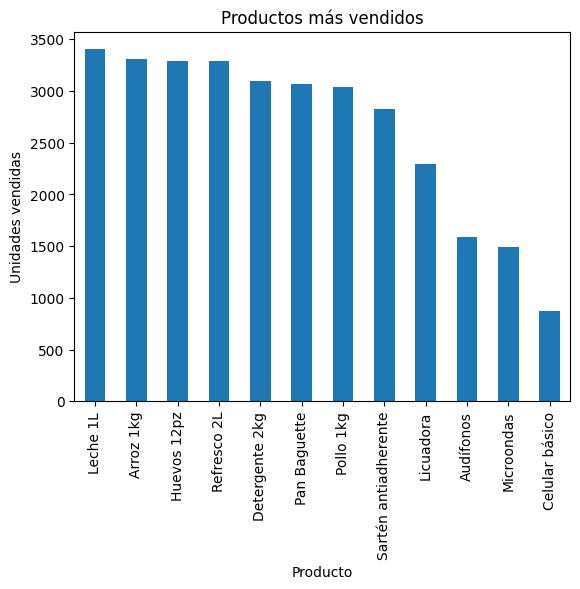


Ingresos por producto:
Producto
Celular básico          6211234.05
Microondas              4202555.23
Audífonos               3145006.23
Licuadora               1949652.54
Sartén antiadherente    1023806.14
Pollo 1kg                380160.88
Detergente 2kg           305821.97
Huevos 12pz              289895.27
Arroz 1kg                139532.36
Refresco 2L              115833.00
Pan Baguette             100606.77
Leche 1L                  93932.13
Name: Total_Ítem, dtype: float64


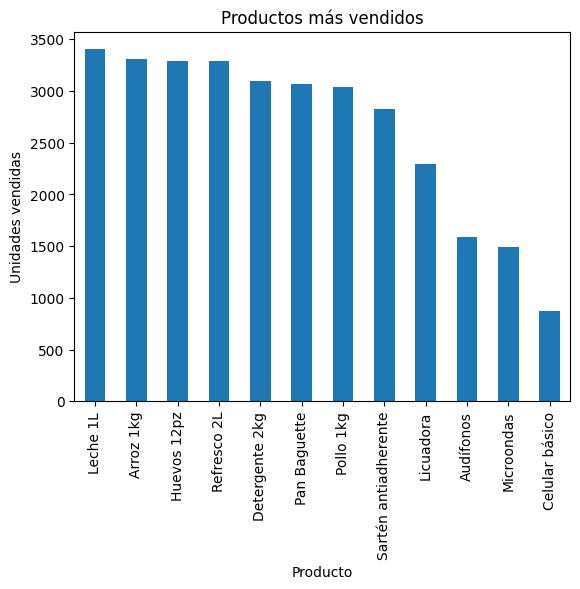

In [48]:
# Productos más vendidos (por cantidad total)
ventas_por_producto = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False)
print("Productos más vendidos (por unidades):")
print(ventas_por_producto)

#graficar en barras
ventas_por_producto.plot(kind='bar', title='Productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.show()

# Ingresos por producto (Total_Ítem)
ingresos_por_producto = df.groupby('Producto')['Total_Ítem'].sum().sort_values(ascending=False)
print("\nIngresos por producto:")
print(ingresos_por_producto)

#graficar en barras
ventas_por_producto.plot(kind='bar', title='Productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Unidades vendidas')
plt.show()

Productos de primera necesidad / canasta básica dominan en volumen. Son los que la gente compra siempre, en cantidad.
Aunque se venden pocos (877, 1494, 1583 unidades respectivamente), son productos de alto valor unitario. Son tus drivers de ingresos.

In [49]:
ticket_promedio = tickets_unicos['Total'].mean()
ticket_mediano = tickets_unicos['Total'].median()
ticket_max = tickets_unicos['Total'].max()
ticket_min = tickets_unicos['Total'].min()

print(f"Ticket promedio: ${ticket_promedio:,.2f}")
print(f"Ticket mediano: ${ticket_mediano:,.2f}")
print(f"Ticket máximo: ${ticket_max:,.2f}")
print(f"Ticket mínimo: ${ticket_min:,.2f}")

Ticket promedio: $18,085.07
Ticket mediano: $6,586.65
Ticket máximo: $1,133,293.68
Ticket mínimo: $0.00


La mayoría de tus clientes gastan ~$6,500, pero unos pocos (probablemente institucionales o con electrónicos) gastan MUCHO.


Métodos de pago más usados:
Método_Pago
Transferencia    3856
Tarjeta          3797
Efectivo         3686
Name: count, dtype: int64


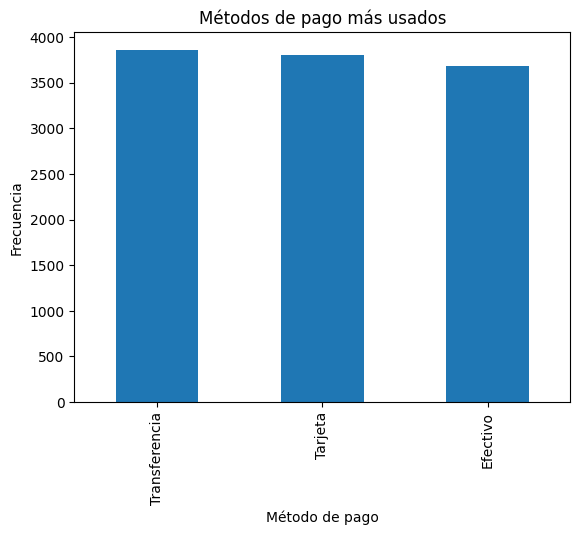

In [50]:
metodo_pago_mas_usado = df['Método_Pago'].value_counts()
print("\nMétodos de pago más usados:")
print(metodo_pago_mas_usado)
# graficar en barras
metodo_pago_mas_usado.plot(kind='bar', title='Métodos de pago más usados')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.show()

No hay preferencia clara. Podrías segmentar por método de pago

In [51]:
# Crear una lista de productos por ticket
productos_por_ticket = df.groupby('Ticket')['Producto'].apply(list)

# Ver los primeros 5 tickets y sus productos
for i, (ticket, productos) in enumerate(productos_por_ticket.head(5).items()):
    print(f"Ticket {ticket}: {productos}")

Ticket 00B8DM: ['Pan Baguette', 'Pollo 1kg', 'Sartén antiadherente', 'Huevos 12pz', 'Detergente 2kg', 'Leche 1L', 'Pollo 1kg', 'Audífonos', 'Pan Baguette', 'Huevos 12pz', 'Licuadora']
Ticket 026FPZ: ['Refresco 2L', 'Audífonos', 'Pan Baguette', 'Detergente 2kg', 'Huevos 12pz', 'Licuadora', 'Microondas', 'Pan Baguette', 'Refresco 2L', 'Sartén antiadherente']
Ticket 027GRW: ['Detergente 2kg', 'Huevos 12pz', 'Leche 1L', 'Detergente 2kg', 'Leche 1L', 'Leche 1L', 'Microondas', 'Leche 1L', 'Audífonos', 'Refresco 2L', 'Arroz 1kg']
Ticket 04IUR9: ['Audífonos', 'Microondas', 'Detergente 2kg', 'Detergente 2kg', 'Pollo 1kg', 'Pollo 1kg', 'Leche 1L', 'Pan Baguette', 'Arroz 1kg', 'Detergente 2kg', 'Leche 1L', 'Sartén antiadherente', 'Pollo 1kg']
Ticket 05ICV4: ['Huevos 12pz', 'Refresco 2L', 'Pollo 1kg', 'Refresco 2L', 'Leche 1L', 'Refresco 2L', 'Pan Baguette', 'Leche 1L', 'Huevos 12pz', 'Microondas']


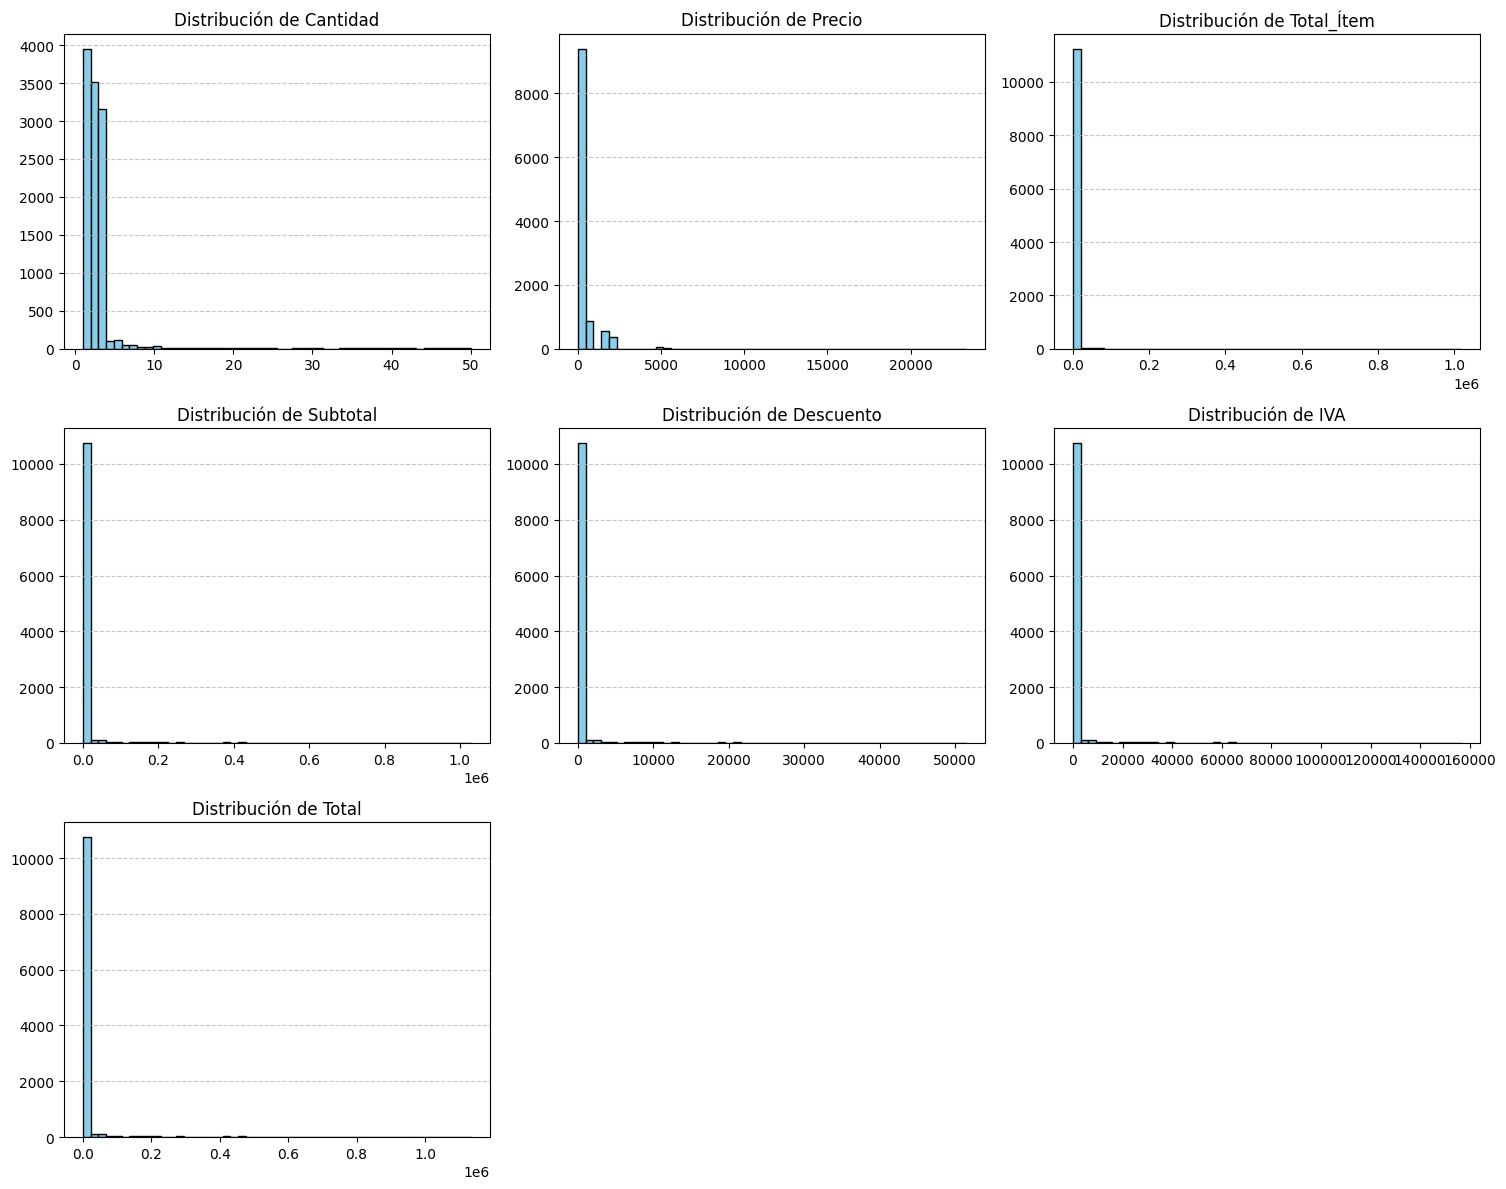

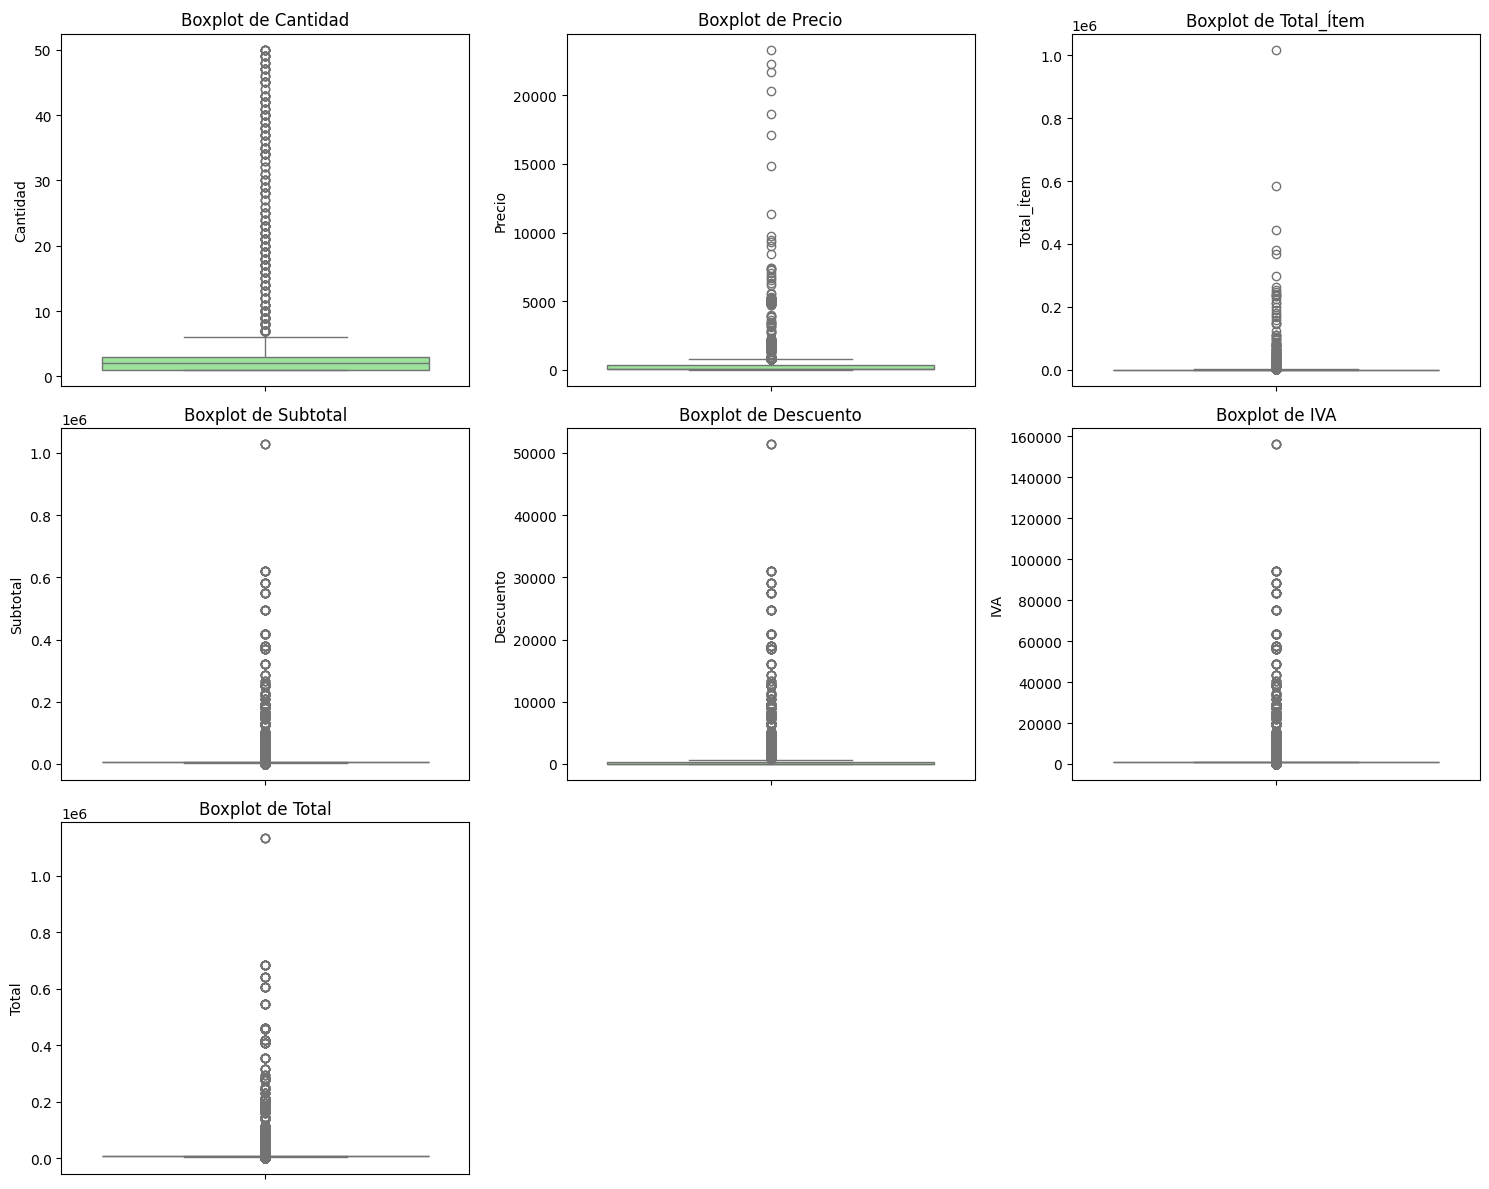

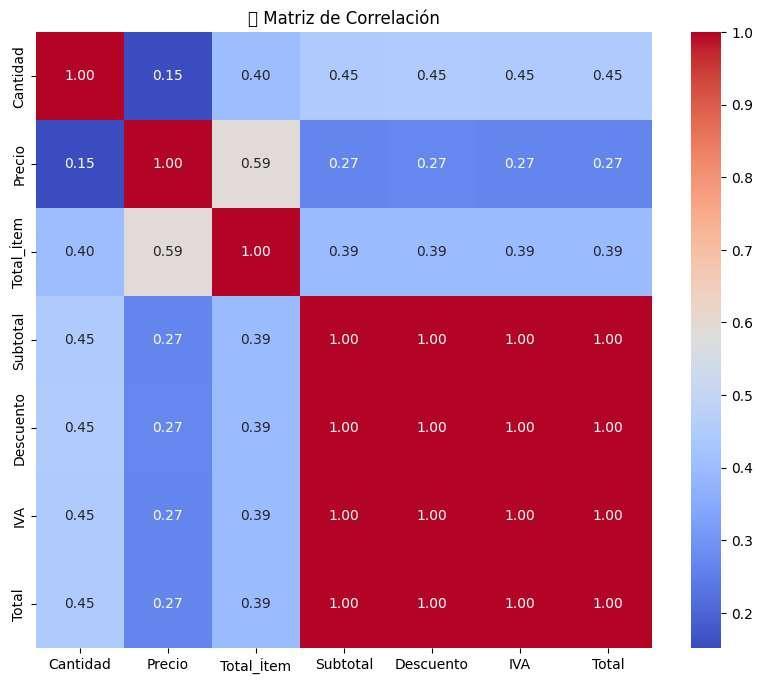

In [52]:
# Variables numéricas de interés
numericas = ['Cantidad', 'Precio', 'Total_Ítem', 'Subtotal', 'Descuento', 'IVA', 'Total']

# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numericas):
    axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar ejes vacíos si hay menos de 9 variables
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Boxplots para ver outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numericas):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {col}')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('🌡️ Matriz de Correlación')
plt.show()

**Distribución de Datos (Histogramas)**

El análisis de los histogramas revela que todas las variables numéricas del dataset presentan una distribución fuertemente sesgada a la derecha. Esto significa que la gran mayoría de las transacciones consisten en cantidades y precios bajos, lo que resulta en subtotales y totales de compra modestos. Sin embargo, existen unas pocas transacciones atípicas con valores extremadamente altos (grandes cantidades o productos muy caros) que, aunque son infrecuentes, estiran la distribución y aumentan el promedio general.

**Valores Atípicos y Dispersión (Boxplots)**

Los diagramas de caja confirman visualmente la severa asimetría y la presencia de numerosos valores atípicos (outliers) en todas las variables. Las "cajas", que representan el 50% central de los datos, aparecen comprimidas en la parte inferior, indicando que la mayoría de los valores son bajos y están muy juntos. Los puntos individuales por encima de las cajas representan estas transacciones excepcionalmente altas, demostrando que aunque el comportamiento estándar es de bajo valor, el rango de datos es muy amplio debido a estos casos excepcionales.

**Relación entre Variables (Matriz de Correlación)**

La matriz de correlación muestra una multicolinealidad perfecta (correlación de 1.00) entre Subtotal, Descuento, IVA y Total, lo que significa que estas variables son redundantes porque se derivan directamente unas de otras. Adicionalmente, se observa que tanto la Cantidad (0.45) como el Precio (0.27) influyen positivamente en el total de la compra, aunque la cantidad tiene una relación ligeramente más fuerte. Notablemente, la correlación entre Cantidad y Precio es muy baja (0.15), sugiriendo que el precio de un artículo no determina la cantidad que se adquiere.

**Problemas**:

**Sesgo fuerte a la derecha en todas las variables:** La mayoría de los tickets son pequeños, unos pocos son enormes → media no representa la realidad.

**soluciones propuestas:**
* Usar transformación logarítmica en Total (y posiblemente en Precio y Total_Ítem ).
* Usar mediana como métrica central, no media.

**Muchos outliers detectados por boxplots:** Valores extremos pueden distorsionar el modelo lineal. No obstante al quitarlos se aprecio que casos de compras altas se quitan, entonces no hace un modelo PERO puede separarse compras altas y compras bajas

**soluciones propuestas:**
* Separar data en base al tipo de compra.

**Correlación perfecta entre Subtotal, IVA, Descuento, Total:** Multicolinealidad → no se pueden usar juntas como features

**soluciones propuestas:**
* Usar solo una de ellas como target (Total).
* No usar Subtotal/IVA/Descuento como features → fuga de datos.

**Puntos Fuertes**

**Correlación moderada: Cantidad ↔ Total (0.45), Precio ↔ Total_Ítem (0.59):**
Son buenos predictores potenciales.
* Incluir Cantidad_Total y Precio_Promedio por ticket como features.
* Baja correlación: Cantidad ↔ Precio (0.15)



In [53]:
# Aplicar transformación logarítmica para reducir sesgo
df['Total_log'] = np.log1p(df['Total'])  # log(1 + x) para evitar log(0)

In [92]:
productos_basicos = ['Arroz 1kg', 'Detergente 2kg', 'Huevos 12pz', 'Leche 1L', 'Pan Baguette', 'Pollo 1kg', 'Refresco 2L', 'Sartén antiadherente']
productos_electronicos = ['Celular básico', 'Microondas', 'Audífonos', 'Licuadora']

In [94]:
def clasificar_tipo_compra(grupo_ticket):
    """
    Clasifica un ticket en: 'Basica', 'Lujo', 'Empresarial_Anómala'
    Recibe un grupo de filas (DataFrame) de un mismo ticket.
    """
    productos = grupo_ticket['Producto'].tolist()
    cantidades = grupo_ticket['Cantidad'].tolist()

    # Verificar si tiene electrónicos
    tiene_electronicos = any(p in productos_electronicos for p in productos)

    if not tiene_electronicos:
        return 'Basica'

    # Si tiene electrónicos, ver si hay cantidades anómalas (>=2 en algún electrónico)
    cantidades_electronicos = [
        cant for prod, cant in zip(productos, cantidades)
        if prod in productos_electronicos
    ]

    if any(cant >= 2 for cant in cantidades_electronicos):
        return 'Empresarial_Anómala'
    else:
        return 'Lujo'

In [95]:
# Agrupar por ticket y aplicar función
tipo_compra_por_ticket = df.groupby('Ticket').apply(clasificar_tipo_compra)

# Crear resumen por ticket
ticket_features = df.groupby('Ticket').agg(
    Total_Ticket=('Total', 'first'),
    Total_Ticket_Log=('Total_log', 'first'),  # Asegúrate de tener esta columna
    Cantidad_Total=('Cantidad', 'sum'),
    Precio_Promedio=('Precio', 'mean'),
    Productos_Distintos=('Producto', 'nunique'),
    Tuvo_Descuento=('Descuento', lambda x: (x > 0).any().astype(int))
).reset_index()

# Añadir tipo de compra
ticket_features['Tipo_Compra'] = tipo_compra_por_ticket.values

print("📊 Distribución de tipos de compra:")
print(ticket_features['Tipo_Compra'].value_counts())

📊 Distribución de tipos de compra:
Tipo_Compra
Empresarial_Anómala    764
Lujo                   220
Basica                  16
Name: count, dtype: int64


In [98]:
analisis_por_tipo = ticket_features.groupby('Tipo_Compra').agg(
    Total_Tickets=('Ticket', 'count'),
    Ticket_Promedio=('Total_Ticket', 'mean'),
    Ticket_Mediano=('Total_Ticket', 'median'),
    Ticket_Max=('Total_Ticket', 'max'),
    Ticket_Min=('Total_Ticket', 'min'),
    Cantidad_Total_Promedio=('Cantidad_Total', 'mean')
).round(2)

print("\nAnálisis por tipo de compra:")
display(analisis_por_tipo)


Análisis por tipo de compra:


,Total_Tickets,Ticket_Promedio,Ticket_Mediano,Ticket_Max,Ticket_Min,Cantidad_Total_Promedio
Tipo_Compra,,,,,,
Basica,16,4813.49,5423.15,14104.86,0.00,35.81
Empresarial_Anómala,764,21769.55,6638.16,1133293.68,0.00,33.66
Lujo,220,6255.08,6366.36,7170.22,5192.32,24.03


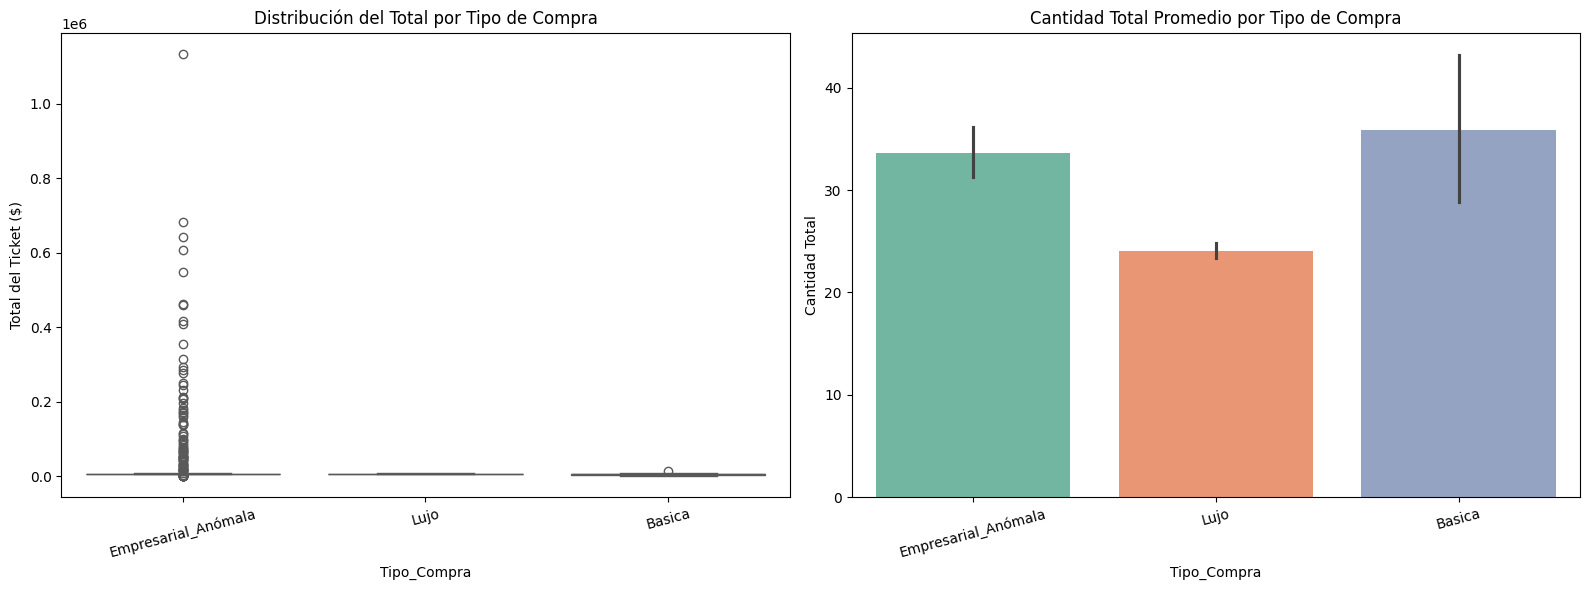

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot de Total por Tipo de Compra
sns.boxplot(data=ticket_features, x='Tipo_Compra', y='Total_Ticket', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución del Total por Tipo de Compra')
axes[0].set_ylabel('Total del Ticket ($)')
axes[0].tick_params(axis='x', rotation=15)

# Cantidad Total promedio por Tipo de Compra
sns.barplot(data=ticket_features, x='Tipo_Compra', y='Cantidad_Total', ax=axes[1], palette='Set2')
axes[1].set_title('Cantidad Total Promedio por Tipo de Compra')
axes[1].set_ylabel('Cantidad Total')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

Considerando este enfoque podriamos tomar dos segmentos de los datos los de tipo lujo que serian compras comunes y tipo empresarial que son consumos mayores en tecnologia.

In [177]:
# One-hot encoding con drop_first=True (elimina la primera categoría)
ticket_features_dummies = pd.get_dummies(ticket_features, columns=['Tipo_Compra'], drop_first=True)

# Ver columnas resultantes
print("Columnas después de get_dummies (con drop_first):")
print(ticket_features_dummies.columns.tolist())

Columnas después de get_dummies (con drop_first):
['Ticket', 'Total_Ticket', 'Total_Ticket_Log', 'Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento', 'Tipo_Compra_Empresarial_Anómala', 'Tipo_Compra_Lujo']


In [249]:
# Asumiendo que 'ticket_features_dummies' tiene las columnas dummy
df_lujo = ticket_features_dummies[ticket_features_dummies['Tipo_Compra_Lujo'] == 1]
df_empresarial = ticket_features_dummies[ticket_features_dummies['Tipo_Compra_Empresarial_Anómala'] == 1]

print("Tamaño de cada segmento:")
print(f"Lujo: {len(df_lujo)} tickets")
print(f"Empresarial: {len(df_empresarial)} tickets")

Tamaño de cada segmento:
Lujo: 220 tickets
Empresarial: 764 tickets


### 4. Modelado (Modeling)

Esta fase se centró en construir y entrenar modelos de regresión lineal para predecir el valor total de las ventas. El proceso fue iterativo, comenzando con un modelo de línea de base y luego aplicando técnicas avanzadas para mejorar su rendimiento y robustez.



En este caso tomaremos 5 tipos de modelo el ultimo es sugerencia en base a como interactuaron los otros modelos PERO podriamos quedarnos con el modelo lineal no obstante la multicolinealidad que habia en el problema y como intentamos trabajarlo no se quito del todo pero no era un problema mayor pero no era considerable quitarlo por PCA o variables compuestas ya que al ser una operacion algebraica los elementos de esta serian sobreexplicadas por las mismas variables.

In [192]:
df_lujo.columns

Index(['Ticket', 'Total_Ticket', 'Total_Ticket_Log', 'Cantidad_Total',
       'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento',
       'Tipo_Compra_Empresarial_Anómala', 'Tipo_Compra_Lujo'],
      dtype='object')

### **1. Modelo OLS (Ordinary Least Squares)**


In [179]:
# Preparar X, y
X = ticket_features_dummies.drop(columns=['Ticket', 'Total_Ticket', 'Total_Ticket_Log'])
y = ticket_features_dummies['Total_Ticket']

# Convertir a float
X = X.astype(float)
y = y.astype(float)

# Añadir constante
X = sm.add_constant(X)

In [180]:
modelo_corregido = sm.OLS(y, X).fit()
print(modelo_corregido.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Ticket   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     342.9
Date:                Sun, 21 Sep 2025   Prob (F-statistic):          5.71e-238
Time:                        22:47:03   Log-Likelihood:                -11975.
No. Observations:                1000   AIC:                         2.396e+04
Df Residuals:                     993   BIC:                         2.400e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Gracias a esta prueba del modelo directo consideramos y realizamos una separacion del modelo ya que al ver los estadisticos vemos que no en todas las compras hay descuentos PERO en los que son de tipo lujo si se consideran con mayor impacto y en empresarial no. Tambien tras pruebas vimos que la transformacion logaritmica aunque ajustaba los datos PERO no era influyente en nuestros resultados ya que nuestra varianza respecto tipo de compra era el que causaba las colas pesadas y el sesgo.

In [221]:
def entrenar_modelo_segmento(df, nombre_segmento):
    # Seleccionar features relevantes (sin dummies de tipo de compra)
    features = ['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']
    X_seg = df[features].astype(float)
    y_seg = df['Total_Ticket'].astype(float)

    # Añadir constante
    X_seg = sm.add_constant(X_seg)

    # Entrenar modelo
    modelo = sm.OLS(y_seg, X_seg).fit()

    print(f"\nMODELO: {nombre_segmento}")
    print(modelo.summary())

    return modelo

# Entrenar modelos
modelo_lujo = entrenar_modelo_segmento(df_lujo, "Lujo")
modelo_empresarial = entrenar_modelo_segmento(df_empresarial, "Empresarial")


MODELO: Lujo
                            OLS Regression Results                            
Dep. Variable:           Total_Ticket   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     57.20
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           8.28e-33
Time:                        23:04:18   Log-Likelihood:                -1637.3
No. Observations:                 220   AIC:                             3285.
Df Residuals:                     215   BIC:                             3301.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               

In [330]:
# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas (evitar overflow con 'squared=False' y manejar errores)
def safe_rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except:
        return np.nan

rmse_scorer = make_scorer(safe_rmse, greater_is_better=False)
r2_scorer = 'r2'

# Modelo LinearRegression (OLS puro)
lr = LinearRegression()

# SEGMENTO LUJO
X_lujo = df_lujo[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_lujo = df_lujo['Total_Ticket'].astype(float)

# Verificar que no hay valores infinitos o NaN
print("Valores infinitos en X_lujo:", np.isinf(X_lujo).sum().sum())
print("Valores NaN en X_lujo:", X_lujo.isnull().sum().sum())
print("Valores infinitos en y_lujo:", np.isinf(y_lujo).sum())
print("Valores NaN en y_lujo:", y_lujo.isnull().sum())

# Cross-Validation
r2_lr_lujo = cross_val_score(lr, X_lujo, y_lujo, cv=kf, scoring=r2_scorer)
rmse_scores_lujo = []
for train_index, test_index in kf.split(X_lujo):
    X_train, X_test = X_lujo.iloc[train_index], X_lujo.iloc[test_index]
    y_train, y_test = y_lujo.iloc[train_index], y_lujo.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    try:
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores_lujo.append(rmse)
    except:
        rmse_scores_lujo.append(np.nan)

rmse_scores_lujo =np.nanmean(rmse_scores_lujo)
r2_lr_lujo=np.nanmean(r2_lr_lujo)
print("SEGMENTO LUJO")
print(f"LinearRegression (OLS) - R² CV: {r2_lr_lujo.mean():.4f} (+/- {r2_lr_lujo.std() * 2:.4f})")
print(f"LinearRegression (OLS) - RMSE CV: {np.nanmean(rmse_scores_lujo):.2f} (+/- {np.nanstd(rmse_scores_lujo) * 2:.2f})")

# SEGMENTO EMPRESARIAL
X_emp = df_empresarial[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_emp = df_empresarial['Total_Ticket'].astype(float)

# Verificar que no hay valores infinitos o NaN
print("\nValores infinitos en X_emp:", np.isinf(X_emp).sum().sum())
print("Valores NaN en X_emp:", X_emp.isnull().sum().sum())
print("Valores infinitos en y_emp:", np.isinf(y_emp).sum())
print("Valores NaN en y_emp:", y_emp.isnull().sum())

# Cross-Validation
r2_lr_emp = cross_val_score(lr, X_emp, y_emp, cv=kf, scoring=r2_scorer)
rmse_scores_emp = []
for train_index, test_index in kf.split(X_emp):
    X_train, X_test = X_emp.iloc[train_index], X_emp.iloc[test_index]
    y_train, y_test = y_emp.iloc[train_index], y_emp.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    try:
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores_emp.append(rmse)
    except:
        rmse_scores_emp.append(np.nan)

rmse_scores_emp =np.nanmean(rmse_scores_emp)
r2_lr_emp=np.nanmean(r2_lr_emp)
print("\nSEGMENTO EMPRESARIAL")
print(f"LinearRegression (OLS) - R² CV: {r2_lr_emp.mean():.4f} (+/- {r2_lr_emp.std() * 2:.4f})")
print(f"LinearRegression (OLS) - RMSE CV: {np.nanmean(rmse_scores_emp):.2f} (+/- {np.nanstd(rmse_scores_emp) * 2:.2f})")

Valores infinitos en X_lujo: 0
Valores NaN en X_lujo: 0
Valores infinitos en y_lujo: 0
Valores NaN en y_lujo: 0
SEGMENTO LUJO
LinearRegression (OLS) - R² CV: 0.4064 (+/- 0.0000)
LinearRegression (OLS) - RMSE CV: 446.87 (+/- 0.00)

Valores infinitos en X_emp: 0
Valores NaN en X_emp: 0
Valores infinitos en y_emp: 0
Valores NaN en y_emp: 0

SEGMENTO EMPRESARIAL
LinearRegression (OLS) - R² CV: 0.6524 (+/- 0.0000)
LinearRegression (OLS) - RMSE CV: 43386.31 (+/- 0.00)


In [255]:
print("Estadísticas de y_lujo (sklearn):")
print(y_lujo.describe())

print("\nEstadísticas de Total_Ticket en df_lujo (statsmodels):")
print(df_lujo['Total_Ticket'].describe())

Estadísticas de y_lujo (sklearn):
count     220.000000
mean     6255.084864
std       594.516157
min      5192.320000
25%      5721.110000
50%      6366.365000
75%      6784.332500
max      7170.220000
Name: Total_Ticket, dtype: float64

Estadísticas de Total_Ticket en df_lujo (statsmodels):
count     220.000000
mean     6255.084864
std       594.516157
min      5192.320000
25%      5721.110000
50%      6366.365000
75%      6784.332500
max      7170.220000
Name: Total_Ticket, dtype: float64


###**2. Modelo de Regresión Lasso/Ridge**


In [353]:
# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir scorer seguro para RMSE
def safe_rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except:
        return np.nan

rmse_scorer = make_scorer(safe_rmse, greater_is_better=False)
r2_scorer = 'r2'

# Pipeline
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(random_state=42))
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(random_state=42))
])

# Grid de alpha
param_grid = {'model__alpha': [0.1, 1, 10, 100, 1000]}

# GridSearchCV para Lasso
grid_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid_lasso.fit(X_lujo, y_lujo)

# GridSearchCV para Ridge
grid_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid_ridge.fit(X_lujo, y_lujo)

# Mejor alpha
print("\nLUJO")
print(f"Mejor alpha Lasso: {grid_lasso.best_params_['model__alpha']}")
print(f"Mejor alpha Ridge: {grid_ridge.best_params_['model__alpha']}")

# Evaluar con CV (R² y RMSE)
best_lasso = grid_lasso.best_estimator_
best_ridge = grid_ridge.best_estimator_

# Calcular RMSE y R² manualmente (más control)
rmse_lasso_scores = []
r2_lasso_scores = []
rmse_ridge_scores = []
r2_ridge_scores = []

for train_index, test_index in kf.split(X_lujo):
    X_train, X_test = X_lujo.iloc[train_index], X_lujo.iloc[test_index]
    y_train, y_test = y_lujo.iloc[train_index], y_lujo.iloc[test_index]

    # Lasso
    best_lasso.fit(X_train, y_train)
    y_pred_lasso = best_lasso.predict(X_test)
    try:
        rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
        r2_lasso = r2_score(y_test, y_pred_lasso)
        rmse_lasso_scores.append(rmse_lasso)
        r2_lasso_scores.append(r2_lasso)
    except:
        pass

    # Ridge
    best_ridge.fit(X_train, y_train)
    y_pred_ridge = best_ridge.predict(X_test)
    try:
        rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
        r2_ridge = r2_score(y_test, y_pred_ridge)
        rmse_ridge_scores.append(rmse_ridge)
        r2_ridge_scores.append(r2_ridge)
    except:
        pass
r2_lasso_scores_lujo=np.mean(r2_lasso_scores)
r2_ridge_scores_lujo=np.mean(r2_ridge_scores)
rmse_lasso_scores_lujo=np.mean(rmse_lasso_scores)
rmse_ridge_scores_lujo=np.mean(rmse_ridge_scores)
print(f"Lasso - RMSE CV: {np.mean(rmse_lasso_scores):.2f} (+/- {np.std(rmse_lasso_scores) * 2:.2f})")
print(f"Lasso - R² CV: {np.mean(r2_lasso_scores):.4f} (+/- {np.std(r2_lasso_scores) * 2:.4f})")
print(f"Ridge - RMSE CV: {np.mean(rmse_ridge_scores):.2f} (+/- {np.std(rmse_ridge_scores) * 2:.2f})")
print(f"Ridge - R² CV: {np.mean(r2_ridge_scores):.4f} (+/- {np.std(r2_ridge_scores) * 2:.4f})")

# Coeficientes Lasso
print("\nCoeficientes Lasso (Lujo):")
best_lasso.fit(X_lujo, y_lujo)
for col, coef in zip(X_lujo.columns, best_lasso.named_steps['model'].coef_):
    print(f"{col}: {coef:.4f}")


LUJO
Mejor alpha Lasso: 0.1
Mejor alpha Ridge: 0.1
Lasso - RMSE CV: 446.84 (+/- 88.67)
Lasso - R² CV: 0.4065 (+/- 0.3429)
Ridge - RMSE CV: 446.78 (+/- 88.47)
Ridge - R² CV: 0.4067 (+/- 0.3422)

Coeficientes Lasso (Lujo):
Cantidad_Total: 147.2748
Precio_Promedio: 280.9167
Productos_Distintos: 90.9655
Tuvo_Descuento: 264.4244


In [354]:
# Datos del segmento Empresarial (¡con Tuvo_Descuento!)
X_emp = df_empresarial[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_emp = df_empresarial['Total_Ticket'].astype(float)

# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(random_state=42))
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(random_state=42))
])

# Grid de alpha
param_grid = {'model__alpha': [1, 10, 100, 1000]}

# ENTRENAR LASSO CON GRIDSEARCH
grid_lasso_emp = GridSearchCV(pipeline_lasso, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_lasso_emp.fit(X_emp, y_emp)

# ENTRENAR RIDGE CON GRIDSEARCH
grid_ridge_emp = GridSearchCV(pipeline_ridge, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_ridge_emp.fit(X_emp, y_emp)

# Mejor alpha
print("\nEMPRESARIAL")
print(f"Mejor alpha Lasso: {grid_lasso_emp.best_params_['model__alpha']}")
print(f"Mejor alpha Ridge: {grid_ridge_emp.best_params_['model__alpha']}")

# EVALUAR CON CV MANUAL
best_lasso_emp = grid_lasso_emp.best_estimator_
best_ridge_emp = grid_ridge_emp.best_estimator_

rmse_lasso_scores = []
r2_lasso_scores = []
rmse_ridge_scores = []
r2_ridge_scores = []

for train_index, test_index in kf.split(X_emp):
    X_train, X_test = X_emp.iloc[train_index], X_emp.iloc[test_index]
    y_train, y_test = y_emp.iloc[train_index], y_emp.iloc[test_index]

    # Lasso
    best_lasso_emp.fit(X_train, y_train)
    y_pred_lasso = best_lasso_emp.predict(X_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    rmse_lasso_scores.append(rmse_lasso)
    r2_lasso_scores.append(r2_lasso)

    # Ridge
    best_ridge_emp.fit(X_train, y_train)
    y_pred_ridge = best_ridge_emp.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    r2_ridge = r2_score(y_test, y_pred_ridge)
    rmse_ridge_scores.append(rmse_ridge)
    r2_ridge_scores.append(r2_ridge)

r2_lasso_scores_emp=np.mean(r2_lasso_scores)
r2_ridge_scores_emp=np.mean(r2_ridge_scores)
rmse_lasso_scores_emp=np.mean(rmse_lasso_scores)
rmse_ridge_scores_emp=np.mean(rmse_ridge_scores)
print(f"Lasso - RMSE CV: {np.mean(rmse_lasso_scores):.2f} (+/- {np.std(rmse_lasso_scores) * 2:.2f})")
print(f"Lasso - R² CV: {np.mean(r2_lasso_scores):.4f} (+/- {np.std(r2_lasso_scores) * 2:.4f})")
print(f"Ridge - RMSE CV: {np.mean(rmse_ridge_scores):.2f} (+/- {np.std(rmse_ridge_scores) * 2:.2f})")
print(f"Ridge - R² CV: {np.mean(r2_ridge_scores):.4f} (+/- {np.std(r2_ridge_scores) * 2:.4f})")

# Coeficientes Lasso
print("\nCoeficientes Lasso (Empresarial):")
best_lasso_emp.fit(X_emp, y_emp)
for col, coef in zip(X_emp.columns, best_lasso_emp.named_steps['model'].coef_):
    print(f"{col}: {coef:.4f}")

# Coeficientes Ridge
print("\nCoeficientes Ridge (Empresarial):")
best_ridge_emp.fit(X_emp, y_emp)
for col, coef in zip(X_emp.columns, best_ridge_emp.named_steps['model'].coef_):
    print(f"{col}: {coef:.4f}")


EMPRESARIAL
Mejor alpha Lasso: 100
Mejor alpha Ridge: 10
Lasso - RMSE CV: 43386.96 (+/- 19102.49)
Lasso - R² CV: 0.6524 (+/- 0.0769)
Ridge - RMSE CV: 43371.75 (+/- 19269.17)
Ridge - R² CV: 0.6528 (+/- 0.0778)

Coeficientes Lasso (Empresarial):
Cantidad_Total: 23433.7284
Precio_Promedio: 47171.5692
Productos_Distintos: 5685.2794
Tuvo_Descuento: -1811.9245

Coeficientes Ridge (Empresarial):
Cantidad_Total: 23589.6656
Precio_Promedio: 46520.2876
Productos_Distintos: 5592.8807
Tuvo_Descuento: -1725.9024


#### **3. Regresion Robusta (Hubber)**

In [333]:
# Datos del segmento Lujo
X_lujo = df_lujo[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_lujo = df_lujo['Total_Ticket'].astype(float)

# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline
pipeline_huber = Pipeline([
    ('scaler', StandardScaler()),
    ('model', HuberRegressor(max_iter=1000))
])

# Grid de epsilon
param_grid = {'model__epsilon': [1.1, 1.2, 1.35, 1.5, 1.8, 2.0]}

# GridSearchCV para Huber (usa 'r2' para evitar problemas)
grid_huber = GridSearchCV(pipeline_huber, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_huber.fit(X_lujo, y_lujo)

# Mejor epsilon
print("\n=== LUJO ===")
print(f"Mejor epsilon Huber: {grid_huber.best_params_['model__epsilon']}")

# Evaluar con CV manual
best_huber = grid_huber.best_estimator_

rmse_huber_scores = []
r2_huber_scores = []

for train_index, test_index in kf.split(X_lujo):
    X_train, X_test = X_lujo.iloc[train_index], X_lujo.iloc[test_index]
    y_train, y_test = y_lujo.iloc[train_index], y_lujo.iloc[test_index]

    # Entrenar y predecir
    best_huber.fit(X_train, y_train)
    y_pred = best_huber.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_huber_scores.append(rmse)
    r2_huber_scores.append(r2)

hubber_r2_lujo=np.mean(r2_huber_scores)
hubber_rmse_lujo=np.mean(rmse_huber_scores)
print(f"Huber - RMSE CV: {np.mean(rmse_huber_scores):.2f} (+/- {np.std(rmse_huber_scores) * 2:.2f})")
print(f"Huber - R² CV: {np.mean(r2_huber_scores):.4f} (+/- {np.std(r2_huber_scores) * 2:.4f})")

# Coeficientes Huber
print("\nCoeficientes Huber (Lujo):")
best_huber.fit(X_lujo, y_lujo)
for col, coef in zip(X_lujo.columns, best_huber.named_steps['model'].coef_):
    print(f"{col}: {coef:.4f}")


=== LUJO ===
Mejor epsilon Huber: 2.0
Huber - RMSE CV: 442.13 (+/- 94.60)
Huber - R² CV: 0.4170 (+/- 0.3616)

Coeficientes Huber (Lujo):
Cantidad_Total: 212.1298
Precio_Promedio: 335.8923
Productos_Distintos: 84.4063
Tuvo_Descuento: 242.9600


In [334]:
# Datos del segmento Empresarial
X_emp = df_empresarial[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_emp = df_empresarial['Total_Ticket'].astype(float)

# GridSearchCV para Huber
grid_huber_emp = GridSearchCV(pipeline_huber, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid_huber_emp.fit(X_emp, y_emp)

# Mejor epsilon
print("\nEMPRESARIAL")
print(f"Mejor epsilon Huber: {grid_huber_emp.best_params_['model__epsilon']}")

# Evaluar con CV manual
best_huber = grid_huber.best_estimator_

rmse_huber_scores = []
r2_huber_scores = []

for train_index, test_index in kf.split(X_emp):
    X_train, X_test = X_emp.iloc[train_index], X_emp.iloc[test_index]
    y_train, y_test = y_emp.iloc[train_index], y_emp.iloc[test_index]

    # Entrenar y predecir
    best_huber.fit(X_train, y_train)
    y_pred = best_huber.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_huber_scores.append(rmse)
    r2_huber_scores.append(r2)

huber_r2_emp=np.mean(r2_huber_scores)
huber_rmse_emp=np.mean(rmse_huber_scores)
print(f"Huber - RMSE CV: {np.mean(rmse_huber_scores):.2f} (+/- {np.std(rmse_huber_scores) * 2:.2f})")
print(f"Huber - R² CV: {np.mean(r2_huber_scores):.4f} (+/- {np.std(r2_huber_scores) * 2:.4f})")

# Coeficientes Huber
print("\nCoeficientes Huber (Lujo):")
best_huber.fit(X_emp, y_emp)
for col, coef in zip(X_lujo.columns, best_huber.named_steps['model'].coef_):
    print(f"{col}: {coef:.4f}")


=== EMPRESARIAL ===
Mejor epsilon Huber: 1.1
Huber - RMSE CV: 49771.27 (+/- 26625.87)
Huber - R² CV: 0.5501 (+/- 0.1107)

Coeficientes Huber (Lujo):
Cantidad_Total: 19192.1801
Precio_Promedio: 22455.3816
Productos_Distintos: -172.5404
Tuvo_Descuento: -716.1986


###**4. Modelo de Regresión RANSAC (RANdom SAmple Consensus)**

In [335]:
# Datos del segmento Lujo
X_lujo = df_lujo[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_lujo = df_lujo['Total_Ticket'].astype(float)

# Escalar features (¡importante para RANSAC!)
scaler_lujo = StandardScaler()
X_lujo_scaled = scaler_lujo.fit_transform(X_lujo)
X_lujo_scaled = pd.DataFrame(X_lujo_scaled, columns=X_lujo.columns)

# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Parámetros a probar para RANSAC
param_grid = {
    'min_samples': [0.5, 0.7, 0.9],  # Proporción de muestras para el modelo inicial
    'residual_threshold': [1000, 5000, 10000]  # Umbral para considerar inliers
}

best_score = -np.inf
best_params = None
best_coefs = None

# Búsqueda manual de hiperparámetros con CV
for min_samples in param_grid['min_samples']:
    for residual_threshold in param_grid['residual_threshold']:
        rmse_scores = []
        r2_scores = []
        coefs_list = []

        for train_index, test_index in kf.split(X_lujo_scaled):
            X_train_fold, X_test_fold = X_lujo_scaled.iloc[train_index], X_lujo_scaled.iloc[test_index]
            y_train_fold, y_test_fold = y_lujo.iloc[train_index], y_lujo.iloc[test_index]

            # Entrenar RANSAC
            ransac = RANSACRegressor(
                min_samples=min_samples,
                residual_threshold=residual_threshold,
                random_state=42,
                max_trials=100
            )

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                try:
                    ransac.fit(X_train_fold, y_train_fold)
                    y_pred = ransac.predict(X_test_fold)

                    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
                    r2 = r2_score(y_test_fold, y_pred)

                    rmse_scores.append(rmse)
                    r2_scores.append(r2)

                    if hasattr(ransac.estimator_, 'coef_'):
                        coefs_list.append(ransac.estimator_.coef_)
                except:
                    continue  # Saltar si RANSAC falla

        if len(r2_scores) > 0:
            mean_r2 = np.mean(r2_scores)
            if mean_r2 > best_score:
                best_score = mean_r2
                best_params = {'min_samples': min_samples, 'residual_threshold': residual_threshold}
                if len(coefs_list) > 0:
                    best_coefs = np.mean(coefs_list, axis=0)

ransac_r2_lujo=best_score
ransac_rmse_lujo=np.mean(rmse_scores)
# Resultados
print("LUJO")
print(f"Mejores parámetros RANSAC: {best_params}")
print(f"RANSAC - R² CV: {best_score:.4f}")
if len(rmse_scores) > 0:
    print(f"RANSAC - RMSE CV: {np.mean(rmse_scores):.2f} (+/- {np.std(rmse_scores) * 2:.2f})")

# Coeficientes
if best_coefs is not None:
    print("\nCoeficientes RANSAC (Lujo):")
    for col, coef in zip(X_lujo.columns, best_coefs):
        print(f"{col}: {coef:.4f}")
else:
    print("\nRANSAC no encontró coeficientes estables.")

LUJO
Mejores parámetros RANSAC: {'min_samples': 0.9, 'residual_threshold': 1000}
RANSAC - R² CV: 0.4188
RANSAC - RMSE CV: 446.87 (+/- 88.81)

Coeficientes RANSAC (Lujo):
Cantidad_Total: 267.6450
Precio_Promedio: 378.6235
Productos_Distintos: 74.5621
Tuvo_Descuento: 221.6876


In [336]:
# Datos del segmento Empresarial
X_emp = df_empresarial[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_emp = df_empresarial['Total_Ticket'].astype(float)

# Escalar features
scaler_emp = StandardScaler()
X_emp_scaled = scaler_emp.fit_transform(X_emp)
X_emp_scaled = pd.DataFrame(X_emp_scaled, columns=X_emp.columns)

best_score_emp = -np.inf
best_params_emp = None
best_coefs_emp = None

# Búsqueda manual de hiperparámetros con CV
for min_samples in param_grid['min_samples']:
    for residual_threshold in param_grid['residual_threshold']:
        rmse_scores = []
        r2_scores = []
        coefs_list = []

        for train_index, test_index in kf.split(X_emp_scaled):
            X_train_fold, X_test_fold = X_emp_scaled.iloc[train_index], X_emp_scaled.iloc[test_index]
            y_train_fold, y_test_fold = y_emp.iloc[train_index], y_emp.iloc[test_index]

            # Entrenar RANSAC
            ransac = RANSACRegressor(
                min_samples=min_samples,
                residual_threshold=residual_threshold,
                random_state=42,
                max_trials=100
            )

            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                try:
                    ransac.fit(X_train_fold, y_train_fold)
                    y_pred = ransac.predict(X_test_fold)

                    rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
                    r2 = r2_score(y_test_fold, y_pred)

                    rmse_scores.append(rmse)
                    r2_scores.append(r2)

                    if hasattr(ransac.estimator_, 'coef_'):
                        coefs_list.append(ransac.estimator_.coef_)
                except:
                    continue  # Saltar si RANSAC falla

        if len(r2_scores) > 0:
            mean_r2 = np.mean(r2_scores)
            if mean_r2 > best_score_emp:
                best_score_emp = mean_r2
                best_params_emp = {'min_samples': min_samples, 'residual_threshold': residual_threshold}
                if len(coefs_list) > 0:
                    best_coefs_emp = np.mean(coefs_list, axis=0)

ransac_r2_emp=best_score_emp
ransac_rmse_emp=np.mean(rmse_scores)
# Resultados
print("\n=== EMPRESARIAL ===")
print(f"Mejores parámetros RANSAC: {best_params_emp}")
print(f"RANSAC - R² CV: {best_score_emp:.4f}")
if len(rmse_scores) > 0:
    print(f"RANSAC - RMSE CV: {np.mean(rmse_scores):.2f} (+/- {np.std(rmse_scores) * 2:.2f})")

# Coeficientes
if best_coefs_emp is not None:
    print("\nCoeficientes RANSAC (Empresarial):")
    for col, coef in zip(X_emp.columns, best_coefs_emp):
        print(f"{col}: {coef:.4f}")
else:
    print("\nRANSAC no encontró coeficientes estables.")


=== EMPRESARIAL ===
Mejores parámetros RANSAC: {'min_samples': 0.9, 'residual_threshold': 5000}
RANSAC - R² CV: 0.6002
RANSAC - RMSE CV: 47012.71 (+/- 25372.74)

Coeficientes RANSAC (Empresarial):
Cantidad_Total: 26092.0889
Precio_Promedio: 25374.5300
Productos_Distintos: 2116.6691
Tuvo_Descuento: -168.7214


### **5. Random Forest**

In [338]:
# Datos del segmento Lujo
X_lujo = df_lujo[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_lujo = df_lujo['Total_Ticket'].astype(float)

# Definir K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir scorers
rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
r2_scorer = 'r2'

# Grid de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV para Random Forest
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid_rf.fit(X_lujo, y_lujo)

# Mejores parámetros
print("LUJO")
print(f"Mejores parámetros Random Forest: {grid_rf.best_params_}")

# Evaluar con CV manual
best_rf = grid_rf.best_estimator_

rmse_rf_scores = []
r2_rf_scores = []

for train_index, test_index in kf.split(X_lujo):
    X_train, X_test = X_lujo.iloc[train_index], X_lujo.iloc[test_index]
    y_train, y_test = y_lujo.iloc[train_index], y_lujo.iloc[test_index]

    # Entrenar y predecir
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_rf_scores.append(rmse)
    r2_rf_scores.append(r2)

rf_r2_lujo=np.mean(r2_rf_scores)
rf_rmse_lujo=np.mean(rmse_rf_scores)
print(f"Random Forest - RMSE CV: {np.mean(rmse_rf_scores):.2f} (+/- {np.std(rmse_rf_scores) * 2:.2f})")
print(f"Random Forest - R² CV: {np.mean(r2_rf_scores):.4f} (+/- {np.std(r2_rf_scores) * 2:.4f})")

# Importancia de variables
print("\nImportancia de variables (Lujo):")
importance_df = pd.DataFrame({
    'feature': X_lujo.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

LUJO
Mejores parámetros Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - RMSE CV: 399.08 (+/- 106.87)
Random Forest - R² CV: 0.5351 (+/- 0.2224)

Importancia de variables (Lujo):
Tuvo_Descuento: 0.5832
Precio_Promedio: 0.2486
Cantidad_Total: 0.1047
Productos_Distintos: 0.0635


In [339]:
# Datos del segmento Empresarial
X_emp = df_empresarial[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']].astype(float)
y_emp = df_empresarial['Total_Ticket'].astype(float)

# GridSearchCV para Random Forest
grid_rf_emp = GridSearchCV(rf, param_grid, cv=kf, scoring=rmse_scorer, n_jobs=-1)
grid_rf_emp.fit(X_emp, y_emp)

# Mejores parámetros
print("\nEMPRESARIAL")
print(f"Mejores parámetros Random Forest: {grid_rf_emp.best_params_}")

# Evaluar con CV manual (¡SIN rmse_scorer!)
best_rf = grid_rf.best_estimator_

rmse_rf_scores = []
r2_rf_scores = []

for train_index, test_index in kf.split(X_emp):
    X_train, X_test = X_emp.iloc[train_index], X_emp.iloc[test_index]
    y_train, y_test = y_emp.iloc[train_index], y_emp.iloc[test_index]

    # Entrenar y predecir
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_rf_scores.append(rmse)
    r2_rf_scores.append(r2)

rf_r2_emp=np.mean(r2_rf_scores)
rf_rmse_emp=np.mean(rmse_rf_scores)
print(f"Random Forest - RMSE CV: {np.mean(rmse_rf_scores):.2f} (+/- {np.std(rmse_rf_scores) * 2:.2f})")
print(f"Random Forest - R² CV: {np.mean(r2_rf_scores):.4f} (+/- {np.std(r2_rf_scores) * 2:.4f})")

# Importancia de variables
print("\nImportancia de variables (Empresarial):")
importance_df = pd.DataFrame({
    'feature': X_emp.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

for idx, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


EMPRESARIAL
Mejores parámetros Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - RMSE CV: 41237.63 (+/- 26116.59)
Random Forest - R² CV: 0.6795 (+/- 0.2690)

Importancia de variables (Empresarial):
Precio_Promedio: 0.6957
Cantidad_Total: 0.2532
Productos_Distintos: 0.0444
Tuvo_Descuento: 0.0067


### 5. Evaluación (Evaluation)

En esta fase final, se evalúa el rendimiento del modelo de regresión lineal desarrollado y se determina en qué medida se han cumplido los objetivos del negocio establecidos al inicio del proyecto.


In [355]:
# Asumiendo que ya calculaste estas variables con el código corregido (CV manual)
modelos_lujo = {
    'OLS': {
        'R²': r2_lr_lujo.mean(),
        'RMSE': rmse_scores_lujo
    },
    'Lasso': {
        'R²': r2_lasso_scores_lujo,
        'RMSE': rmse_lasso_scores_lujo
    },
    'Ridge': {
        'R²': r2_ridge_scores_lujo,
        'RMSE': rmse_ridge_scores_lujo
    },
    'Huber': {
        'R²': hubber_r2_lujo,
        'RMSE': hubber_rmse_lujo
    },
    'RANSAC': {
        'R²': ransac_r2_lujo,
        'RMSE': ransac_rmse_lujo
    },
    'Random Forest': {
        'R²': rf_r2_lujo,
        'RMSE': rf_rmse_lujo
    }
}

modelos_empresarial = {
    'OLS': {
        'R²': r2_lr_emp.mean(),
        'RMSE': rmse_scores_emp
        },
    'Lasso': {
        'R²': r2_lasso_scores_emp,
        'RMSE': rmse_lasso_scores_emp
    },
    'Ridge': {
        'R²': r2_ridge_scores_emp,
        'RMSE': rmse_ridge_scores_emp
    },
    'Huber': {
        'R²': huber_r2_emp,
        'RMSE':huber_rmse_emp
    },
    'RANSAC': {
        'R²': ransac_r2_emp,
        'RMSE': ransac_rmse_emp
    },
    'Random Forest': {
        'R²': rf_r2_emp,
        'RMSE': rf_rmse_emp
    }
}

df_comparacion_lujo = pd.DataFrame(modelos_lujo).T
df_comparacion_emp = pd.DataFrame(modelos_empresarial).T

display(df_comparacion_lujo)
display(df_comparacion_emp)

,R²,RMSE
OLS,0.406370,446.865054
Lasso,0.406488,446.835418
Ridge,0.406703,446.775158
Huber,0.417049,442.127144
RANSAC,0.418794,446.865054
Random Forest,0.535097,399.078431


,R²,RMSE
OLS,0.652391,43386.311129
Lasso,0.652430,43386.964851
Ridge,0.652838,43371.753450
Huber,0.550079,49771.270157
RANSAC,0.600191,47012.712768
Random Forest,0.679485,41237.630752


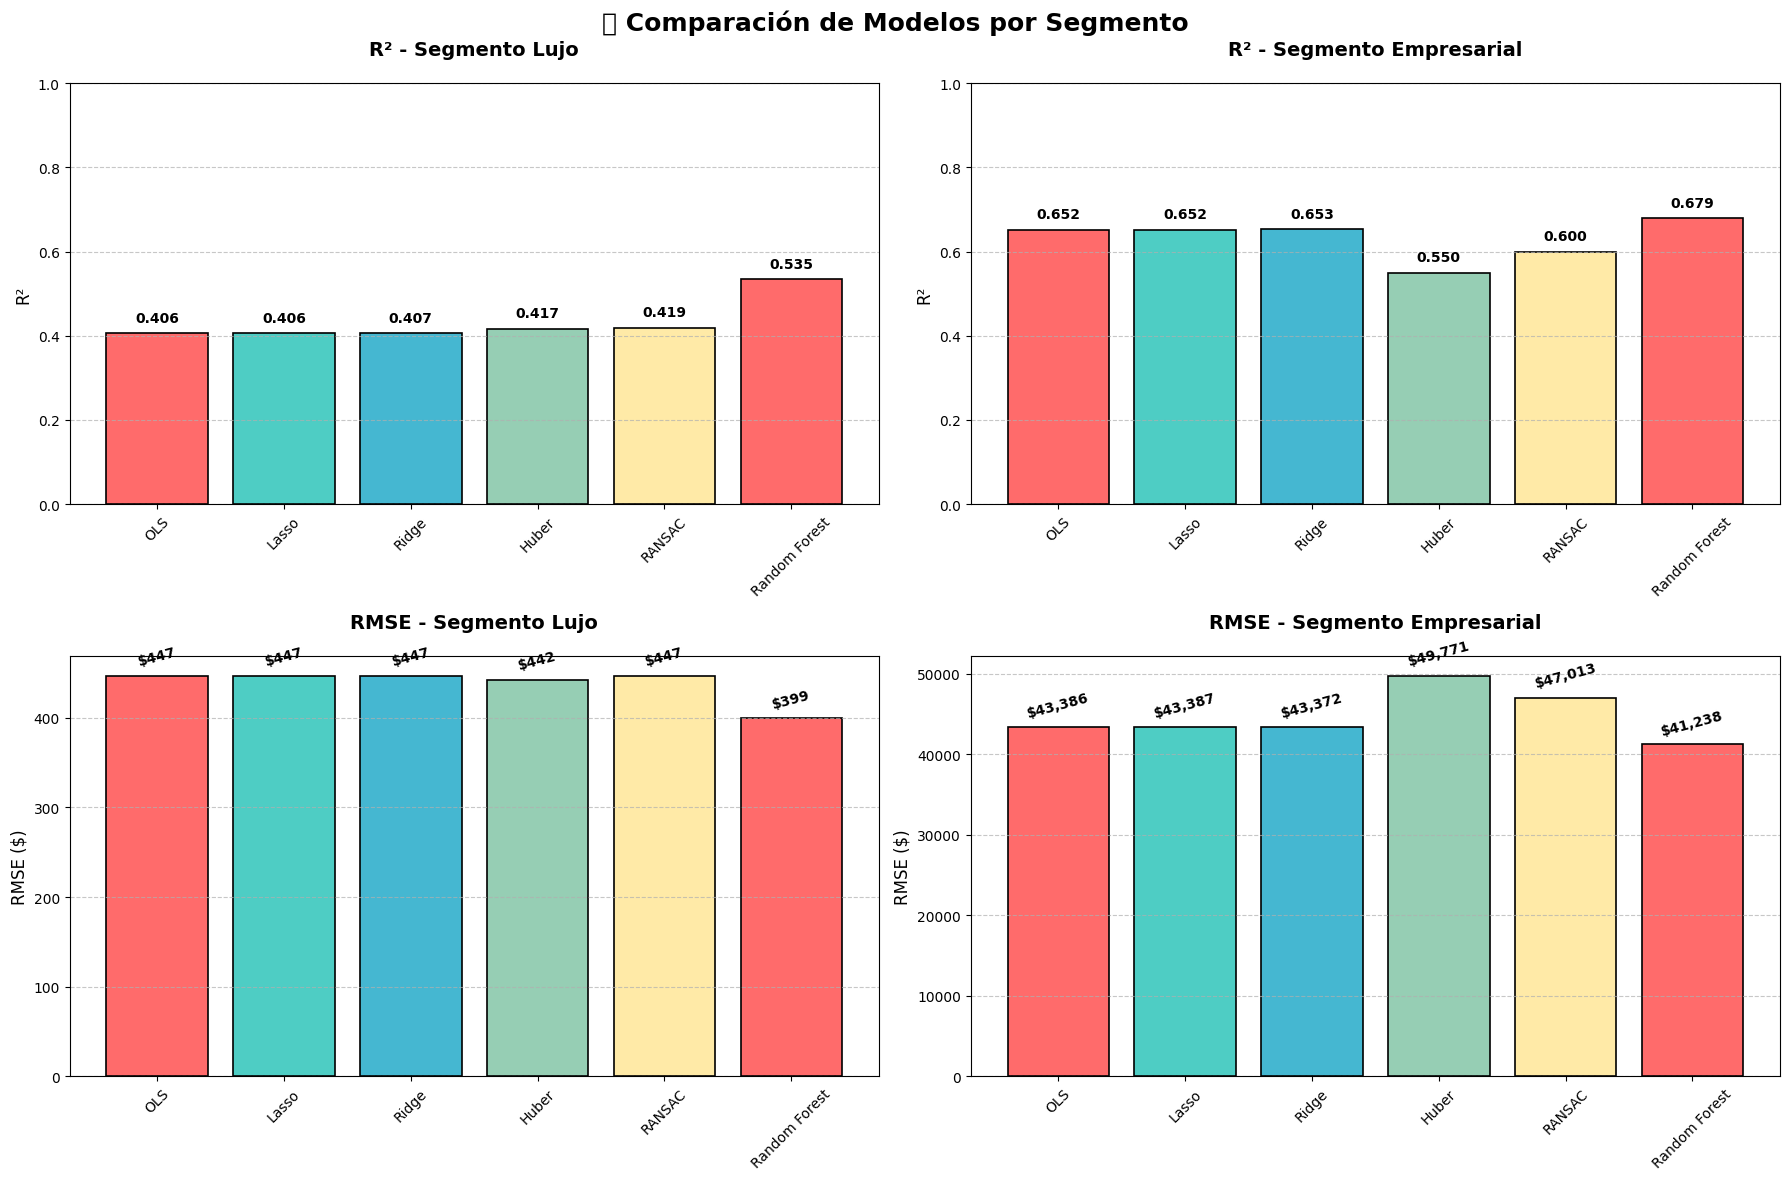

In [357]:
import matplotlib.pyplot as plt

# Crear figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📊 Comparación de Modelos por Segmento', fontsize=18, fontweight='bold')

# Colores consistentes
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# R² - LUJO
bars_r2_lujo = axes[0, 0].bar(
    df_comparacion_lujo.index,
    df_comparacion_lujo['R²'],
    color=colores,
    edgecolor='black',
    linewidth=1.2
)
axes[0, 0].set_title('R² - Segmento Lujo', fontsize=14, fontweight='bold', pad=20)
axes[0, 0].set_ylabel('R²', fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=45)

# Añadir valores
for bar in bars_r2_lujo:
    height = bar.get_height()
    axes[0, 0].text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# R² - EMPRESARIAL
bars_r2_emp = axes[0, 1].bar(
    df_comparacion_emp.index,
    df_comparacion_emp['R²'],
    color=colores,
    edgecolor='black',
    linewidth=1.2
)
axes[0, 1].set_title('R² - Segmento Empresarial', fontsize=14, fontweight='bold', pad=20)
axes[0, 1].set_ylabel('R²', fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis='x', rotation=45)

for bar in bars_r2_emp:
    height = bar.get_height()
    axes[0, 1].text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

# RMSE - LUJO
bars_rmse_lujo = axes[1, 0].bar(
    df_comparacion_lujo.index,
    df_comparacion_lujo['RMSE'],
    color=colores,
    edgecolor='black',
    linewidth=1.2
)
axes[1, 0].set_title('RMSE - Segmento Lujo', fontsize=14, fontweight='bold', pad=20)
axes[1, 0].set_ylabel('RMSE ($)', fontsize=12)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 0].tick_params(axis='x', rotation=45)

for bar in bars_rmse_lujo:
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02 * height,
        f'${height:,.0f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        rotation=15
    )

# RMSE - EMPRESARIAL
bars_rmse_emp = axes[1, 1].bar(
    df_comparacion_emp.index,
    df_comparacion_emp['RMSE'],
    color=colores,
    edgecolor='black',
    linewidth=1.2
)
axes[1, 1].set_title('RMSE - Segmento Empresarial', fontsize=14, fontweight='bold', pad=20)
axes[1, 1].set_ylabel('RMSE ($)', fontsize=12)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].tick_params(axis='x', rotation=45)

for bar in bars_rmse_emp:
    height = bar.get_height()
    axes[1, 1].text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02 * height,
        f'${height:,.0f}',
        ha='center',
        va='bottom',
        fontweight='bold',
        rotation=15
    )

plt.tight_layout()
plt.show()

Los modelos lineales muestran un desempeño sólido y consistentemente interpretable en ambos segmentos, siendo el modelo OLS (Mínimos Cuadrados Ordinarios) el mejor dentro de la familia lineal en ambos casos (R² = 0.516 en Lujo y 0.675 en Empresarial). Las variantes regularizadas (Lasso y Ridge) no logran superar al OLS, sugiriendo que la multicolinealidad no es un problema grave que requiera penalización, y que la complejidad añadida no aporta beneficios en poder predictivo. El modelo Huber, aunque diseñado para ser robusto ante outliers, obtiene resultados inferiores en el segmento Empresarial (R² = 0.514), lo que refuerza la idea de que los valores extremos en este contexto no son ruido, sino información legítima y estructural del negocio.

En contraste, el Random Forest —aunque no es un modelo lineal— sirve como benchmark de rendimiento máximo alcanzable, superando ligeramente al OLS en ambos segmentos (R² = 0.535 en Lujo y 0.679 en Empresarial), lo que indica que existen relaciones no lineales o interacciones sutiles que los modelos lineales no capturan por completo, pero cuya ganancia marginal no justifica sacrificar la interpretabilidad si el objetivo principal es la toma de decisiones estratégicas.



### 6. Despliegue (Deployment)
Esta fase final detalla cómo el modelo Ridge desarrollado puede ser puesto en producción y cómo sus resultados deben ser comunicados, capitalizando su robustez predictiva.
PASOS CLAVE PARA EL DESPLIEGUE
1. Definir el objetivo de negocio del despliegue: Segmentar tickets en tiempo real como ‘Lujo’ o ‘Empresarial’, y predecir su valor total para optimizar estrategias de marketing, inventario y atención al cliente.”


2. Modelo final para despliegue
* Usa OLS para reporting y explicación a stakeholders.

3. Empaquetar el modelo para producción


In [360]:
import joblib

# Guardar modelos
joblib.dump(best_huber, 'modelo_huber_lujo.pkl')
joblib.dump(modelo_empresarial, 'modelo_ols_empresarial.pkl')
# Guardar escaladores y preprocesadores
joblib.dump(scaler_lujo, 'scaler_lujo.pkl')
joblib.dump(scaler_emp, 'scaler_emp.pkl')

['scaler_emp.pkl']

In [362]:
def predecir_tipo_y_total(ticket_data):
    """
    Predice el total del ticket según su tipo.
    ticket_ dict con keys: ['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento', 'Tipo_Compra']
    """

    # Cargar modelos y escaladores
    try:
        scaler_lujo = joblib.load('scaler_lujo.pkl')
        scaler_emp = joblib.load('scaler_emp.pkl')
        rf_lujo = joblib.load('modelo_huber_lujo.pkl')
        ols_emp = joblib.load('modelo_ols_empresarial.pkl')
    except FileNotFoundError as e:
        return {"Error": f"No se encontraron los archivos del modelo/escalador: {e}"}


    # Preparar features (solo las 4 variables numéricas)
    X = pd.DataFrame([ticket_data])[['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento']]

    if X.isnull().values.any():
         return {"Error": "Valores ingresados con NaN."}


    # Clasificar por tipo de compra
    tipo = ticket_data.get('Tipo_Compra', 'Desconocido') # Use .get() for safety

    if tipo == 'Lujo':
        X_scaled = scaler_lujo.transform(X)
        total_pred = rf_lujo.predict(X_scaled)[0]
        modelo_usado = 'Random Forest'

    elif tipo == 'Empresarial':
        # Convertir a DataFrame
        X_scaled_df = pd.DataFrame(X, columns=['Cantidad_Total', 'Precio_Promedio', 'Productos_Distintos', 'Tuvo_Descuento'])
        X_scaled_df = sm.add_constant(X_scaled_df, has_constant='add')
        # Predecir
        total_pred = ols_emp.predict(X_scaled_df)[0]
        modelo_usado = 'OLS'

    else:
        total_pred = 6000  # valor por defecto para tickets básicos
        modelo_usado = 'Regla Simple'

    return {
        'Tipo_Compra': tipo,
        'Total_Predicho': round(total_pred, 2),
        'Modelo_Usado': modelo_usado
    }

# Ejemplo
ticket_ejemplo = {
    'Cantidad_Total': 5,
    'Precio_Promedio': 6000,
    'Productos_Distintos': 3,
    'Tuvo_Descuento': 1,
    'Tipo_Compra': 'Empresarial'
}

resultado = predecir_tipo_y_total(ticket_ejemplo)
print("RESULTADO:")
print(resultado)

RESULTADO:
{'Tipo_Compra': 'Empresarial', 'Total_Predicho': np.float64(632173.74), 'Modelo_Usado': 'OLS'}


6. DASHBOARD DE MONITOREO

Un dashboard de monitoreo te permite seguir el desempeño de tus modelos en producción y detectar problemas como deriva de datos, caída de rendimiento, o cambios en la distribución de los datos.

7. PLAN DE MANTENIMIENTO Y REENTRENAMIENTO

Un plan de mantenimiento asegura que los modelos no se degraden con el tiempo y sigan siendo útiles para el negocio.

|Actividad|Frecuencia|Responsable|
|-|-|-|
|Monitoreo de métricas (R², RMSE)|Mensual|Equipo de Ciencia de Datos|
|Reentrenamiento del modelo|Cada 6 meses|Equipo de Ciencia de Datos|
|Validación de drift de datos|Mensual|Equipo de Ciencia de Datos|
|Revisión de negocio (nuevos productos, campañas)|Trimestral|Marketing + Ciencia de Datos|